In [1]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


In [2]:
import network_simulation as net_sims
import popconstruct as pops
import plotting_helper_functions as plt_help
import pandas as pd
import os
import time
import pdb

import pylab as pl
import pickle
import numpy as np
import pandas as pd
import pingouin
import sklearn 

def saveresults_vars(variable, prefix):
    pickle.dump(variable, open(prefix, 'wb'))
    
def loadresults_vars(prefix):
    return pickle.load(open(prefix, "rb"))

data_dir = "./Data/stop-params_freeze-analysis/amplitudes/"
figure_dir = "./Figures/stop-params_freeze-analysis/"

2023-08-24 12:33:06,347	INFO worker.py:1352 -- Connecting to existing Ray cluster at address: 127.0.0.1:6379...
2023-08-24 12:33:06,384	INFO worker.py:1529 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


In [3]:
solutions_amplitude_GPeA = np.arange(0.2, 0.9, 0.1)
solutions_amplitude_iSPN = np.arange(0.2, 0.9, 0.1)

print(solutions_amplitude_GPeA)
print(solutions_amplitude_iSPN)

[0.2 0.3 0.4 0.5 0.6 0.7 0.8]
[0.2 0.3 0.4 0.5 0.6 0.7 0.8]


# Plots

### Datatables

In [4]:
datatables = pd.DataFrame()

for i in solutions_amplitude_GPeA:
    
    for k in solutions_amplitude_iSPN:
    
        net = pickle.load(open(data_dir+'iSPN+GPeA_10threads/network_data_GPeA_'+str(np.round(i, 1))+'_iSPN_'+str(np.round(k, 1)), 'rb'))

        for j in np.arange(len(net)):

            temp = net[j]['datatables']
            temp['ampl_GPeA'] = i
            temp['ampl_iSPN'] = k
            temp['num_stops'] = [1 if x == 'stop' else 0 for x in temp.decision]
            temp['thread'] = j
            #temp['p_stop'] = sum(temp['num_stops'].values/50)
            datatables = datatables.append(temp, ignore_index = True)

datatables['ampl_GPeA'] = np.round(datatables['ampl_GPeA'].values, 3)
datatables['ampl_iSPN'] = np.round(datatables['ampl_iSPN'].values, 3)
saveresults_vars(datatables, data_dir+'datatables_stop-params-analysis_amplitudes')

In [5]:
datatables

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward,ampl_GPeA,ampl_iSPN,num_stops,thread
0,stop,0,301,301,602,602,left,0,0.2,0.2,1,0
1,left,1203,1492,289,590,1793,left,1.0,0.2,0.2,0,0
2,left,2394,2677,283,584,2978,left,1.0,0.2,0.2,0,0
3,stop,3579,3880,301,602,4181,left,0,0.2,0.2,1,0
4,stop,4782,5083,301,602,5384,left,0,0.2,0.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14695,stop,30072,30373,301,602,30674,left,0.0,0.8,0.8,1,9
14696,stop,31275,31576,301,602,31877,left,0.0,0.8,0.8,1,9
14697,stop,32478,32779,301,602,33080,left,0.0,0.8,0.8,1,9
14698,stop,33681,33982,301,602,34283,left,0.0,0.8,0.8,1,9


In [6]:
p_stop_average = pd.DataFrame(datatables.groupby(['ampl_GPeA', 'ampl_iSPN'])['num_stops'].mean()).reset_index()
p_stop_average = p_stop_average.rename({'num_stops': 'p_stop'}, axis=1)
saveresults_vars(p_stop_average, data_dir+'p_stop_average_amplitudes')
p_stop_average

,ampl_GPeA,ampl_iSPN,p_stop
0,0.2,0.2,0.623333
1,0.2,0.3,0.673333
2,0.2,0.4,0.686667
3,0.2,0.5,0.746667
4,0.2,0.6,0.746667
5,0.2,0.7,0.773333
6,0.2,0.8,0.793333
7,0.3,0.2,0.610000
8,0.3,0.3,0.670000
9,0.3,0.4,0.703333


In [7]:
p_stop_table = p_stop_average.pivot_table(index='ampl_iSPN', columns='ampl_GPeA', values='p_stop')
p_stop_table

ampl_GPeA,0.2,0.3,0.4,0.5,0.6,0.7,0.8
ampl_iSPN,,,,,,,
0.2,0.623333,0.610000,0.576667,0.570000,0.603333,0.626667,0.600000
0.3,0.673333,0.670000,0.673333,0.636667,0.623333,0.573333,0.606667
0.4,0.686667,0.703333,0.623333,0.723333,0.683333,0.656667,0.656667
0.5,0.746667,0.716667,0.733333,0.756667,0.700000,0.656667,0.656667
0.6,0.746667,0.753333,0.726667,0.750000,0.713333,0.723333,0.686667
0.7,0.773333,0.760000,0.773333,0.750000,0.706667,0.780000,0.720000
0.8,0.793333,0.776667,0.813333,0.750000,0.750000,0.703333,0.693333


In [8]:
p_stop_reverse = p_stop_table.iloc[::-1]
p_stop_reverse

ampl_GPeA,0.2,0.3,0.4,0.5,0.6,0.7,0.8
ampl_iSPN,,,,,,,
0.8,0.793333,0.776667,0.813333,0.750000,0.750000,0.703333,0.693333
0.7,0.773333,0.760000,0.773333,0.750000,0.706667,0.780000,0.720000
0.6,0.746667,0.753333,0.726667,0.750000,0.713333,0.723333,0.686667
0.5,0.746667,0.716667,0.733333,0.756667,0.700000,0.656667,0.656667
0.4,0.686667,0.703333,0.623333,0.723333,0.683333,0.656667,0.656667
0.3,0.673333,0.670000,0.673333,0.636667,0.623333,0.573333,0.606667
0.2,0.623333,0.610000,0.576667,0.570000,0.603333,0.626667,0.600000


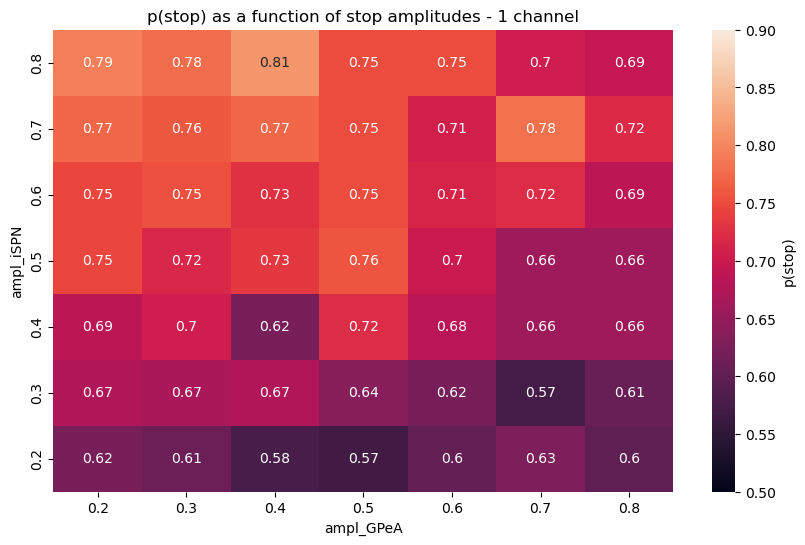

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 6))
#sns.pointplot(data=datatables_D1, x='GPeA-D1', y='num_stops', errorbar="sd", ax = ax, color='brown')
sns.heatmap(p_stop_reverse, cbar_kws={'label': 'p(stop)'}, 
           vmin=0.5, vmax=0.9, annot=True)
plt.title('p(stop) as a function of stop amplitudes - 1 channel')

plt.savefig(figure_dir+'p_stop-heatmap_stop-params-analysis_amplitudes_59')

### Difference in terms of p(stop) between sims

In [38]:
p_stop_table_diff = p_stop_table_10 - p_stop_table_6
p_stop_reverse_diff = p_stop_table_diff.iloc[::-1]
p_stop_reverse_diff

onset,0,10,20,30,40,50,60,70,80,90,100
duration,,,,,,,,,,,
200,-0.030000,-0.006667,-0.006667,0.013333,0.000000,0.000000,0.010000,0.003333,0.013333,-0.010000,0.010000
180,0.003333,0.030000,-0.060000,0.033333,0.016667,0.006667,0.006667,-0.013333,0.000000,0.013333,0.020000
160,-0.036667,0.003333,0.070000,0.080000,0.040000,-0.046667,-0.010000,0.006667,0.003333,-0.023333,-0.053333
140,0.006667,0.050000,0.000000,0.026667,0.010000,-0.040000,0.006667,0.080000,0.020000,0.033333,-0.003333
120,0.003333,0.003333,0.033333,0.023333,-0.026667,0.050000,0.016667,-0.016667,-0.010000,0.026667,-0.010000
100,0.026667,0.003333,0.053333,0.020000,-0.016667,-0.013333,-0.020000,-0.013333,-0.006667,-0.030000,0.063333
80,0.030000,-0.040000,-0.053333,0.040000,-0.043333,0.060000,-0.026667,-0.020000,0.020000,-0.036667,0.093333


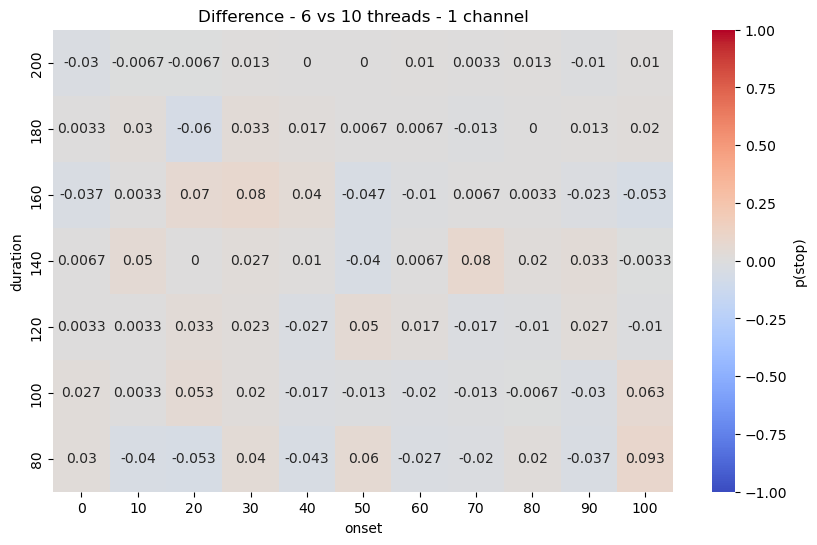

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 6))
#sns.pointplot(data=datatables_D1, x='GPeA-D1', y='num_stops', errorbar="sd", ax = ax, color='brown')
sns.heatmap(p_stop_reverse_diff, cmap="coolwarm", cbar_kws={'label': 'p(stop)'}, 
           vmin=-1, vmax=1, annot=True)
plt.title('Difference - 6 vs 10 threads - 1 channel')

plt.savefig(figure_dir+'p_stop-heatmap_stop-params-analysis_threads-diff')

### Confidence Interval

In [10]:
p_stop_average = pd.DataFrame(datatables.groupby(['ampl_GPeA', 'ampl_iSPN', 'thread'])['num_stops'].mean()).reset_index()
p_stop_average = p_stop_average.rename({'num_stops': 'p_stop'}, axis=1)
#saveresults_vars(p_stop_average, data_dir+'p_stop_average_iSPN+D2+GPeA')
p_stop_average

,ampl_GPeA,ampl_iSPN,thread,p_stop
0,0.2,0.2,0,0.600000
1,0.2,0.2,1,0.633333
2,0.2,0.2,2,0.600000
3,0.2,0.2,3,0.600000
4,0.2,0.2,4,0.633333
...,...,...,...,...
485,0.8,0.8,5,0.566667
486,0.8,0.8,6,0.700000
487,0.8,0.8,7,0.666667
488,0.8,0.8,8,0.733333


In [11]:
import scipy.stats as st
from sklearn.metrics import r2_score, mean_squared_error

def st_interval(g):
    st_interval = st.t.interval(0.95, len(g) -1, loc=np.mean(g.p_stop), scale=st.sem(g.p_stop))
    return pd.Series( dict({'low': st_interval[0], 'high': st_interval[1]}))


p_stop_t = p_stop_average.groupby(['ampl_GPeA', 'ampl_iSPN']).apply(st_interval).reset_index()

In [12]:
np.where(np.isnan(p_stop_t.low))

(array([], dtype=int64),)

In [13]:
p_stop_table_low = p_stop_t.pivot_table(index='ampl_iSPN', columns='ampl_GPeA', values='low')
p_stop_reverse_low = p_stop_table_low.iloc[::-1]
p_stop_reverse_low

ampl_GPeA,0.2,0.3,0.4,0.5,0.6,0.7,0.8
ampl_iSPN,,,,,,,
0.8,0.710121,0.727605,0.742955,0.706103,0.700681,0.645523,0.616435
0.7,0.694809,0.700732,0.711971,0.683262,0.621207,0.728244,0.661375
0.6,0.697412,0.687597,0.643455,0.703314,0.659191,0.667073,0.658677
0.5,0.684894,0.649928,0.692804,0.681220,0.612930,0.594030,0.621032
0.4,0.626974,0.655050,0.549580,0.681199,0.626849,0.587328,0.619301
0.3,0.607022,0.613293,0.639988,0.560056,0.569366,0.527260,0.528951
0.2,0.607239,0.529686,0.504647,0.494219,0.525903,0.566342,0.518166


In [14]:
np.where(np.isnan(p_stop_t.high))

(array([], dtype=int64),)

In [15]:
p_stop_table_high = p_stop_t.pivot_table(index='ampl_iSPN', columns='ampl_GPeA', values='high')
p_stop_reverse_high = p_stop_table_high.iloc[::-1]
p_stop_reverse_high

ampl_GPeA,0.2,0.3,0.4,0.5,0.6,0.7,0.8
ampl_iSPN,,,,,,,
0.8,0.876545,0.825728,0.883712,0.793897,0.799319,0.761144,0.770232
0.7,0.851858,0.819268,0.834696,0.816738,0.792126,0.831756,0.778625
0.6,0.795921,0.819070,0.809879,0.796686,0.767476,0.779593,0.714656
0.5,0.808440,0.783405,0.773862,0.832114,0.787070,0.719303,0.692302
0.4,0.746359,0.751616,0.697087,0.765467,0.739817,0.726005,0.694033
0.3,0.739644,0.726707,0.706679,0.713277,0.677301,0.619407,0.684382
0.2,0.639428,0.690314,0.648686,0.645781,0.680764,0.686991,0.681834


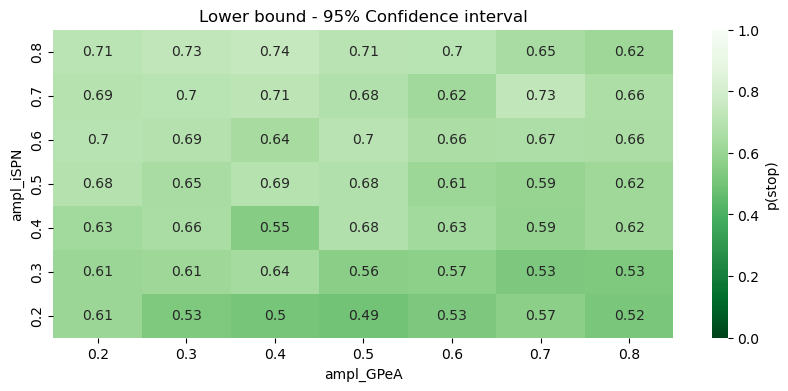

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
#sns.pointplot(data=datatables_D1, x='GPeA-D1', y='num_stops', errorbar="sd", ax = ax, color='brown')
sns.heatmap(p_stop_reverse_low, cmap='Greens_r', cbar_kws={'label': 'p(stop)'}, 
           vmin=0, vmax=1, annot=True)
plt.title('Lower bound - 95% Confidence interval')

plt.savefig(figure_dir+'p_stop-heatmap_stop-params-analysis_amplitudes_t-low')

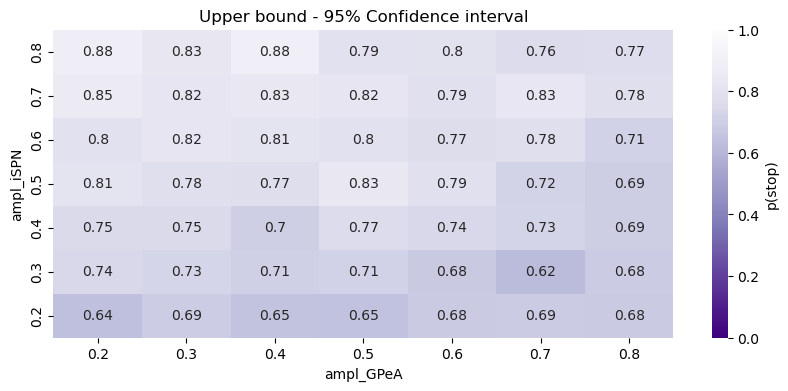

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4))
#sns.pointplot(data=datatables_D1, x='GPeA-D1', y='num_stops', errorbar="sd", ax = ax, color='brown')
sns.heatmap(p_stop_reverse_high, cmap='Purples_r', cbar_kws={'label': 'p(stop)'}, 
           vmin=0, vmax=1, annot=True)
plt.title('Upper bound - 95% Confidence interval')

plt.savefig(figure_dir+'p_stop-heatmap_stop-params-analysis_amplitudes_t-high')